In [ ]:
# Importing relevant libraries

import tensorflow as tf
from tensorflow import keras
from keras import regularizers, models
from tensorflow.keras import Sequential
from tensorflow.keras import layers, activations, callbacks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Loading the CIFAR-10 dataset
(X_train, y_train),( X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [ ]:
# Data pre-processing
X_train, X_test = X_train/255 , X_test / 255

# Data augmentation
augment = ImageDataGenerator(rotation_range = 15, horizontal_flip = True, height_shift_range=0.1, width_shift_range=0.1, zoom_range=0.3)
augment.fit(X_train)

In [ ]:
# Setting up the Evolved CNN model

model = Sequential()

model.add(layers.Conv2D(32, (3,3), strides = (1,1), padding='same', input_shape= X_train[0].shape, activation='elu', ))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), strides = (1,1), padding='same', activation='elu' ))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), strides = (1,1), padding='same', activation='elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), strides = (1,1), padding='same', activation='elu' ))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3,3), strides = (1,1), padding='same', activation='elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), strides = (1,1), padding='same', activation='elu' ))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(4, 4)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

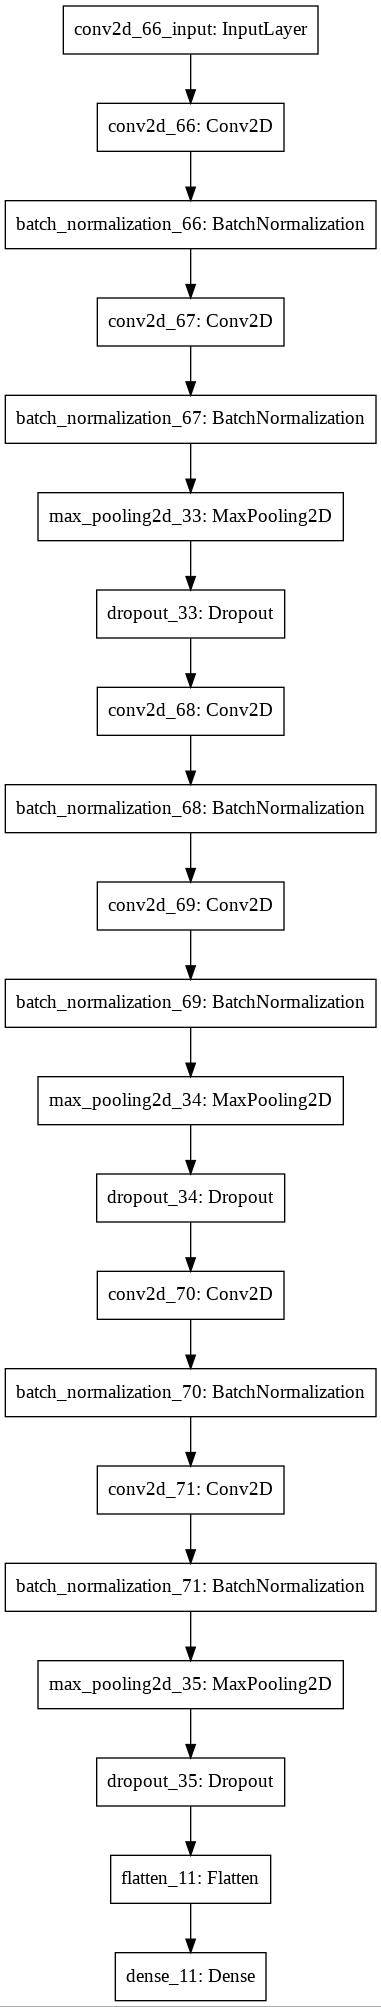

In [ ]:
# A flowchart of the model
tf.keras.utils.plot_model(model, 'EVOLVED CNN.jpeg')

In [ ]:
# Callbacks for early stopping and saving

earlystop = callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 10,
    verbose = 1,
)

checkpoint = callbacks.ModelCheckpoint(
    filepath = '/content/drive/MyDrive',
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_model = True
)

In [ ]:
# Compiling the model

opt = 'adam'

model.compile(optimizer= opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = model.fit(X_train , y_train, 
                    epochs=125, 
                    batch_size=128,
                    validation_split= (0.2), 
                    callbacks = [earlystop, checkpoint])

Epoch 1/125
313/313 [==============================] - ETA: 0s - loss: 2.1021 - accuracy: 0.3513
Epoch 00001: saving model to /content/drive/MyDrive/Colab Notebooks/almost sota/almost_sota.h5
313/313 [==============================] - 4s 12ms/step - loss: 2.1021 - accuracy: 0.3513 - val_loss: 2.2049 - val_accuracy: 0.2488
Epoch 2/125
311/313 [============================>.] - ETA: 0s - loss: 1.9650 - accuracy: 0.4932
Epoch 00002: saving model to /content/drive/MyDrive/Colab Notebooks/almost sota/almost_sota.h5
313/313 [==============================] - 3s 11ms/step - loss: 1.9651 - accuracy: 0.4930 - val_loss: 1.9159 - val_accuracy: 0.5419
Epoch 3/125
308/313 [============================>.] - ETA: 0s - loss: 1.8993 - accuracy: 0.5602
Epoch 00003: saving model to /content/drive/MyDrive/Colab Notebooks/almost sota/almost_sota.h5
313/313 [==============================] - 3s 11ms/step - loss: 1.8990 - accuracy: 0.5604 - val_loss: 1.9123 - val_accuracy: 0.5436
Epoch 4/125
313/313 [=======

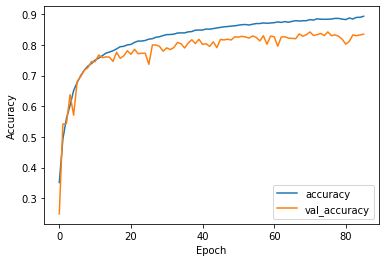

In [ ]:
# Plotting training and validation accuracy over epochs

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('evolved_cnn_accuracy.png')

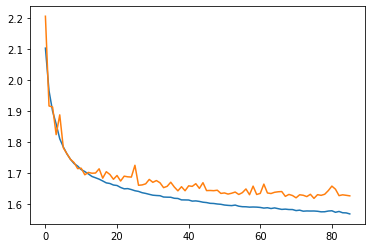

In [ ]:
# Plotting training and validation loss over epochs

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.savefig('evolved_cnn_loss.png')

In [ ]:
# Testing accuracy

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

313/313 - 1s - loss: 1.6285 - accuracy: 0.8309
0.8309000134468079
